<a href="https://colab.research.google.com/github/AmiMunshi/Image_Processing/blob/master/DCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.fftpack import dct, idct
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
#Function to implement 2D DCT and IDCT
def dct2(a):
    return dct(dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return idct(idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

DCT and IDCT on a random matrix

In [34]:
# Generate a random integer matrix of size x X y 
x=8
y=8
f= np.random.randint(9,11,size=(x,y))
F= dct2(f)
print(f)
print(F)

[[ 9  9  9  9  9  9 10  9]
 [ 9  9 10  9 10 10  9 10]
 [10 10 10 10  9 10 10  9]
 [10  9 10  9 10 10 10  9]
 [10 10 10  9 10  9  9 10]
 [10  9 10  9  9  9  9 10]
 [ 9  9  9  9  9  9 10 10]
 [ 9  9 10 10  9  9  9 10]]
[[ 7.56250000e+01 -2.07200694e-01  4.50332945e-01 -4.99937678e-01
  -1.25000000e-01  2.05025908e-01  7.60559162e-01  7.76269649e-01]
 [ 2.41844549e-01  1.06237546e-02 -5.10234084e-01  9.85312071e-01
  -7.10370416e-01  2.70965939e-02 -1.64706040e-01  1.07602409e-01]
 [-1.18287076e+00 -9.61454113e-01 -2.13388348e-01 -7.43830309e-01
   6.76495125e-02  3.02642841e-01 -3.38388348e-01 -5.36119338e-01]
 [-8.83083687e-01 -1.36223777e-01  8.00851213e-01 -9.88713172e-02
   4.22594781e-01 -4.20418937e-01 -1.61575497e-01  4.96918893e-01]
 [-1.25000000e-01  2.37104428e-01 -2.58991229e-01  7.18163394e-02
   1.25000000e-01 -1.42851581e-02 -2.98619396e-01  3.54851853e-01]
 [-4.39721434e-01 -4.66588807e-01  2.71285962e-01  7.86687845e-01
  -5.93854907e-01  1.05597810e+00 -8.12294877e-01  4

In [35]:
#Find Energy of the original image
fenergy= np.sum(f**2)
print(fenergy)


5735


In [36]:
#Find Energy of the DCT of the image
Fenergy= np.sum(F**2)
print(Fenergy)

5735.000000000002


In [37]:
#Energy in the DC coefficient
F[0,0]**2

5719.140625000002

In [47]:
#Retain coefficients with energy more that 0.01% of the Total energy
P= 0.0001*Fenergy
print(P)

0.5735000000000002


In [48]:
Fnew= np.where(F**2 > P, F,0)
print(Fnew)

[[75.625       0.          0.          0.          0.          0.
   0.76055916  0.77626965]
 [ 0.          0.          0.          0.98531207  0.          0.
   0.          0.        ]
 [-1.18287076 -0.96145411  0.          0.          0.          0.
   0.          0.        ]
 [-0.88308369  0.          0.80085121  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.78668784  0.          1.0559781
  -0.81229488  0.        ]
 [ 0.          0.87886082  0.          0.          0.          0.81374802
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.90576663  0.        ]]


In [49]:
# Finding the nonzero values in the compressed matrix
ind,val= np.unique(Fnew,return_counts=True)
nonzeros = np.sum(val[np.where(ind!=0)])
print(nonzeros)

14


In [50]:
#Compression Ratio
Original = x*y
Compressed = nonzeros
CR= Original/Compressed
print(CR)

4.571428571428571


In [51]:
#retrieving the estimate of the original matrix
fnew= idct2(Fnew)
fnew= fnew.astype(int)
print(fnew)

[[ 9  8  8  8  9  9  9  8]
 [ 9  9  9  8  9  9  8 10]
 [10  9  9  9  9  9  9  8]
 [10  9  9  9  9  9  9  9]
 [ 9  9  9  9  9  9  9  9]
 [ 9  9 10  9  8  9  9  9]
 [ 9  9  9  9  9  9  9  9]
 [ 8  9 10  9  9  9  9  9]]


In [52]:
#Obtain Mean Square Error between f and fnew
mse= np.sum(((f-fnew)**2))/(x*y)
print(mse)

0.515625


In [53]:
# Retain first row of the transformed matrix
Fnew1= np.zeros((x,y), dtype =float)
Fnew1[0,:]= F[0,:]
print(Fnew1)

[[75.625      -0.20720069  0.45033294 -0.49993768 -0.125       0.20502591
   0.76055916  0.77626965]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]


In [54]:
fnew1= idct2(Fnew1)
fnew1= fnew1.astype(int)
print(fnew1)

[[9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]]


In [55]:
# Retain first row and first column of the transformed matrix
Fnew2= np.zeros((x,y), dtype =float)
Fnew2[0,:]= F[0,:]
Fnew2[:,0]= F[:,0]
print(Fnew2)

[[75.625      -0.20720069  0.45033294 -0.49993768 -0.125       0.20502591
   0.76055916  0.77626965]
 [ 0.24184455  0.          0.          0.          0.          0.
   0.          0.        ]
 [-1.18287076  0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.88308369  0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.125       0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.43972143  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.08406404  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.17555477  0.          0.          0.          0.          0.
   0.          0.        ]]


In [56]:
fnew2= idct2(Fnew2)
fnew2= fnew2.astype(int)
print(fnew2)

[[ 9  8  9  8  9  9  9  9]
 [ 9  9  9  9  9  9  9  9]
 [ 9  9 10  9  9  9  9  9]
 [ 9  9  9  9  9  9  9  9]
 [ 9  9  9  9  9  9  9  9]
 [ 9  9  9  9  9  9  9  9]
 [ 9  9  9  9  9  9  9  9]
 [ 9  9  9  9  9  9  9  9]]


In [57]:
#Retain the first four coefficients
Fnew3= np.zeros((x,y), dtype =float)
Fnew3[0:2,0:2]= F[0:2,0:2]
print(Fnew3)

[[ 7.56250000e+01 -2.07200694e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.41844549e-01  1.06237546e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   

In [60]:
fnew3= idct2(Fnew3)
fnew3= fnew3.astype(int)
print(fnew3)

[[9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]]


DCT on image with and without compression

In [3]:
img = cv2.imread('/content/lena_gray_256.tif',0)  # Read the image
m,n= img.shape #Find and store size of image in m,n
print(m,n)

256 256


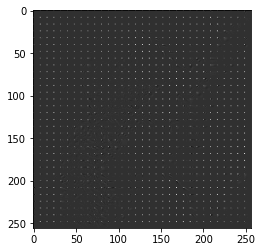

In [5]:
#Find DCT of the given image using DCT function 
N=8 #Size of the block
imgdct = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):
               imgdct[row*N:(row+1)*N,col*N:(col+1)*N]= dct2(img[row*N:(row+1)*N,col*N:(col+1)*N])
plt.imshow(imgdct, cmap="gray")


In [6]:
#Total energy of the image
energy= np.sum(img**2)
print(energy)

6941402


In [25]:
#For compression, retaining only P percent coefficients with max magnitude. 
P= 0.0001*energy
Inew= np.where(imgdct**2 > P, imgdct,0)


In [26]:
# Finding the nonzero values in the compressed matrix
ind,val= np.unique(Inew,return_counts=True)
nonzeros = np.sum(val[np.where(ind!=0)])
print(nonzeros)

5585


In [27]:
#finding nonzero values in the compressed matrix
nonzeros= np.sum([Inew!=0])
print(nonzeros)

5585


In [32]:
#Compression Ratio
CR= (m*n)/nonzeros
print("total Coefficient in the inpur image is ", m*n)
print("total coefficients retained in the output image is ", nonzeros)
print("compression ratio = input size/output size = ", CR)

total Coefficient in the inpur image is  65536
total coefficients retained in the output image is  5585
compression ratio = input size/output size =  11.734288272157565


In [29]:
#Find IDCT of the given image  using IDCT function
inew = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):

               inew[row*N:(row+1)*N,col*N:(col+1)*N]= idct2(Inew[row*N:(row+1)*N,col*N:(col+1)*N])


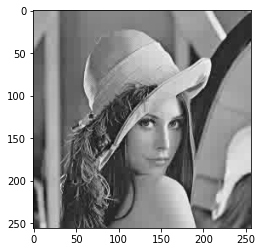

In [30]:
plt.imshow(inew,cmap="gray")